<a href="https://www.kaggle.com/code/icarambadiana/ab-test-new-recommender-system-on-conversion-rate?scriptVersionId=137917507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analyzing the Impact of a New Recommender System on Conversion Rates: A Comparative A/B Test Analysis in an International Online Store

**Analyst: Ica Candra R**<br>
May 2023<br>
<br>
**Reviewed by: Carlos Ortiz**<br>
*Professor of Econometrics and machine learning in Universidad de La Salle, Columbia*

<div class="alert alert-block alert-success">
    
# General comments
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
What a great job you did in this project, Ica! It was a pleasure to read every statement and conclusion you wrote. Very clear, organized and it's obvious you completely understood how this works. Let's move onto 15th!
</div>

# CONTENTS <a id='back'></a>

* [1. PROJECT DESCRIPTION](#intro)
* [2. LIBRARIES AND DATASET](#get_started)
    * [2.1 Import Libraries](#import_lib)
    * [2.2 Load Datasets](#load_data)
    * [2.3 Datasets Info](#data_info)
    * [2.4 Function List](#func_lists)
* [3. DATA PREPROCESSING](#data_preprocessing)
    * [3.1 Duplicates](#duplicates)
    * [3.2 Missing values](#missing_values)
    * [3.3 Filter Sample Datasets](#filter_data)
    * [3.4 Power Analysis on The Filtered Sample](#power_analysis)
    * [3.5 Check Sample Group Proportion](#check_sample_proportion)
    * [3.6 Clean Sample Dataset](#clean_data)
* [4. EDA](#eda)
    * [4.1 Data Transform datasets](#data_transformation)
    * [4.2 Conversion into Event Comparison](#con_event)
    * [4.3 Conversion Funnel Comparison](#con_funnel)
* [5. A/B TEST: STATISTICAL HYPOTHESES TEST](#ab_test)
    * [5.1 Hypotheses](#hypotheses)
    * [5.2 Method](#method_test)
    * [5.3 Data Preparation](#test_prep)
    * [5.3 A/B Test](#testing)
* [CONCLUSION](#conclusion)
* [RECOMMENDATIONS](#recommendations)

## PROJECT DESCRIPTION <a id='intro'></a>

In this project, we set out to analyze the effectiveness of a new recommender system implemented in an international online store, with the primary focus on improving conversion rates. Here's an overview of the technical analysis:<br>

| Requirements | Description |
|-|-------------|
| Test name | `recommender_system_test` |
| Test Groups | А (control), B (new payment funnel)|
| Test duration | `2020-12-07`-`2021-01-01` |
| Taking up new users | `2020-12-07`-`2020-12-21` |
| Audience | 15% of the new users from the EU region |
| Test objective | Testing changes related to the introduction of an improved recommendation system |
| Expected result | Within 14 days of signing up, users will show better conversion into:<br>  (1) product page views (`product_page`)<br>  (2) product card views (`product_card`)<br>  (3) purchases (`purchase`)<br> At each of the stage of the funnel `product_page` → product_card` → `purchase`, there will be at least a 10% increase |
| Expected number of test participants | 6000 |

## LIBRARIES AND DATASET <a id='get_started'></a>

### Import Libraries <a id='import_lib'></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly import graph_objects as go

import math as mth
import scipy.stats as st

from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.power as smp

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# check version used
import sys
import matplotlib
import scipy

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("SciPy version:", scipy.__version__)

Python version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
Pandas version: 1.5.3
NumPy version: 1.23.5
Matplotlib version: 3.7.2
Seaborn version: 0.12.2
SciPy version: 1.7.3


### Load Datasets <a id='load_data'></a>

We will retrieve and check all datasets which are `marketing events`, `new user`, `users activities`, and `ab test result`  

In [3]:
#load datasets

try:
    ##list marketing events
    marketing_events = pd.read_csv('/kaggle/input/ab-test-new-recommender-system/ab_project_marketing_events_us.csv',
                               parse_dates=['start_dt', 'finish_dt'], 
                               dtype={'region':'category'})

    ## new users
    new_users = pd.read_csv('/kaggle/input/ab-test-data-online-store/final_ab_new_users_upd_us.csv',
                            parse_dates=['first_date'],
                            dtype={'region':'category', 'device':'category'})

    ## user activity record
    events = pd.read_csv('/kaggle/input/ab-test-data-online-store/final_ab_events_upd_us.csv',
                     parse_dates=['event_dt'],
                     dtype={'event_name':'category'})

    ## ab testing result
    ab_participants = pd.read_csv('/kaggle/input/ab-test-data-online-store/final_ab_participants_upd_us.csv')
    
except:
    ##list marketing events
    marketing_events = pd.read_csv('datasets/ab_project_marketing_events_us.csv',
                               parse_dates=['start_dt', 'finish_dt'], 
                               dtype={'region':'category'})

    ## new users
    new_users = pd.read_csv('datasets/final_ab_new_users_upd_us.csv',
                            parse_dates=['first_date'],
                            dtype={'region':'category', 'device':'category'})

    ## user activity record
    events = pd.read_csv('datasets/final_ab_events_upd_us.csv',
                     parse_dates=['event_dt'],
                     dtype={'event_name':'category'})

    ## ab testing result
    ab_participants = pd.read_csv('datasets/final_ab_participants_upd_us.csv')

### Datasets Info <a id='data_info'></a>

In [4]:
# define datasets
data = {'marketing events':marketing_events, 'new users':new_users, 'events':events, 'ab participants':ab_participants}
        
# check datasets info
for key, value in data.items():
    print(key.upper())
    print(value.info())
    print('-----------------------------------')
    print()

MARKETING EVENTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
None
-----------------------------------

NEW USERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  category      
 3   device      58703 non-null  category      
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 1.0+ MB
None
----------

In [5]:
# check user activity date
sorted(events['event_dt'].dt.date.unique())

[datetime.date(2020, 12, 7),
 datetime.date(2020, 12, 8),
 datetime.date(2020, 12, 9),
 datetime.date(2020, 12, 10),
 datetime.date(2020, 12, 11),
 datetime.date(2020, 12, 12),
 datetime.date(2020, 12, 13),
 datetime.date(2020, 12, 14),
 datetime.date(2020, 12, 15),
 datetime.date(2020, 12, 16),
 datetime.date(2020, 12, 17),
 datetime.date(2020, 12, 18),
 datetime.date(2020, 12, 19),
 datetime.date(2020, 12, 20),
 datetime.date(2020, 12, 21),
 datetime.date(2020, 12, 22),
 datetime.date(2020, 12, 23),
 datetime.date(2020, 12, 24),
 datetime.date(2020, 12, 26),
 datetime.date(2020, 12, 27),
 datetime.date(2020, 12, 28),
 datetime.date(2020, 12, 29),
 datetime.date(2020, 12, 30)]

 **NOTE:**<br>
- All datasets already have appropriate data types and formatting
- All categories values are already uniform
- The missing values appear only in `events`, column `details`

Let's retrieve all datasets!

#### Marketing Events Dataset
The `marketing_events` dataset recovers data about the calendar of marketing events for 2020. Here's the content: 
- `name` — the name of the marketing event
- `regions` — regions where the ad campaign will be held
- `start_dt` — campaign start date
- `finish_dt` — campaign end date

In [6]:
# retrieve `marketing_events` dataset
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [7]:
# check marketing events in the EU happened during ab test
## filter only EU events
marketing_events = marketing_events.query("regions.str.contains('EU', regex=False)")

## filter data when finish_dt > launch test date (2020-12-07)
filtered_maketing_events = marketing_events.query("finish_dt > '2020-12-06'")
filtered_maketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


#### New Users Dataset
The `new_users` dataset records all users who signed up in the online store from December 7 to 23, 2020. Here's the structure:
- `user_id`/
- `first_date` — sign-up date
- `region`
- `device` — a device used to sign up

In [8]:
# retrieve `new_users` dataset
new_users.tail(3)

,user_id,first_date,region,device
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone
58702,8F04273BB2860229,2020-12-20,EU,Android


In [9]:
# describe the dataset
new_users.describe()

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,D72A72121175D8BE,2020-12-21 00:00:00,EU,Android
freq,1,6077,43396,26159
first,NaN,2020-12-07 00:00:00,NaN,NaN
last,NaN,2020-12-23 00:00:00,NaN,NaN


In [10]:
# check region columns
new_users.groupby('region')['user_id'].nunique()

region
APAC          3126
CIS           3130
EU           43396
N.America     9051
Name: user_id, dtype: int64

#### User Activities (events) Dataset

The `events` dataset record all events of the new users from December 7, 2020, to January 1, 2021. Here's the structure:
- `user_id`
- `event_dt` — event date and time
- `event_name` — event type name
- `details` — additional data on the event (for instance, the order total in USD for `purchase` events)

In [11]:
# retrieve `events` dataset
events.tail(3)

,user_id,event_dt,event_name,details
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN
423760,7AEC61159B672CC5,2020-12-30 11:36:13,login,NaN


In [12]:
# describe the dataset
events.describe(include='all').fillna('')

,user_id,event_dt,event_name,details
count,423761,423761,423761,60314.0
unique,58703,257138,4,
top,A3917F81482141F2,2020-12-14 18:54:55,login,
freq,36,10,182465,
first,,2020-12-07 00:00:33,,
last,,2020-12-30 23:36:33,,
mean,,,,23.881219
std,,,,72.228884
min,,,,4.99
25%,,,,4.99


#### AB Participants Dataset
The `ab_participants` table contains list of users joined as test participants.
- `user_id`
- `ab_test` — test name
- `group` — the test group the user belonged to

In [13]:
# retrieve `ab_participants` dataset
ab_participants.tail(3)

,user_id,group,ab_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test
14524,79F9ABFB029CF724,B,interface_eu_test


In [14]:
# check kind of test in the dataset
ab_participants.groupby(['ab_test', 'group'], as_index=False)['user_id'].nunique()

,ab_test,group,user_id
0,interface_eu_test,A,5467
1,interface_eu_test,B,5383
2,recommender_system_test,A,2747
3,recommender_system_test,B,928


**FINDINGS:**<br>
- We have `new_users` data from `2020-12-07`-`2020-12-23`
- `events` or users' activities' dataset record data from `2020-12-07`-`2020-12-30`.
- According to the technical description, the observation ended on `2021-01-01`. However, we don't have the `events` dataset on `2020-12-25`, `2020-12-31`, and `2021-01-01`. Those days may be included since it's Christmas and new year (the special offers will affect users' behaviors).
- The test period coincides with the celebration of Christmas and New Year. 
- The A/B test for the new recommender system coincides with another A/B test (i.e., interface test). In this case, it may give implications such as:
    1. Users may be exposed to the new recommender system and the new interface simultaneously, making it difficult to attribute observed effects to a specific change.  It becomes challenging to isolate the impact of each change independently.
    2. Simultaneous A/B tests may introduce confounding variables that can impact the results. For example, if the new interface significantly affects user behavior, it may influence the performance and outcomes of the new recommender system. 
    3. the `recommender_sytem_test` participants didn't satisfy the expected sample size (participants = 6000)

**INTERMEDIATE CONCLUSIONS:**<br>
- The available dataset didn't satisfy the requirements according to the technical description
- The AB test was carried out during the high season and coincided with another test, potentially leading to bias.

**ACTIONS:**<br>
- We will filter only participants joined in `recommender_sytem_test` to avoid overlapping participants tests
- Even in the test under the seasonality influence, we have to ensure both groups are affected so that we can ignore this influence on our final result
- Since the total number of participants in `recommender_sytem_test` is below the target participants, we will check the power analysis by using the sample size we have

### Function Lists <a id='func_lists'></a>

This section will list statistical functions we may use.

#### Different Test for Categorical Variables

**Z-Test**

In [15]:
## two-proportion z-test : test the equality of proportions
# Number of successes (conversions) in Group A and Group B
def two_proportion_z_test (control, treatment, alpha=0.05) :
    '''
    Perform a two-proportion z-test to compare the proportions of successes between two groups.

    Parameters:
        control (array-like): Array or Series containing the binary outcomes of the control group.
        treatment (array-like): Array or Series containing the binary outcomes of the treatment group.
        alpha (float, optional): The significance level for hypothesis testing (default: 0.05).

    Returns:
        None: This function does not return any value. It prints the test results.

    Prints:
        - Z-statistic: The calculated Z-statistic value.
        - P-value: The calculated P-value.
        - Conclusion: The conclusion based on the test results.

    Example:
        control = [0, 1, 1, 0, 1]
        treatment = [1, 1, 0, 1, 0]
        two_proportion_z_test(control, treatment, alpha=0.05)
    '''
    
    successes_A = control.sum()
    successes_B = treatment.sum()

    # Number of observations (total trials) in Group A and Group B
    total_A = len(control)
    total_B = len(treatment)

    # Conduct two-proportion z-test
    successes = np.array([successes_A, successes_B])
    trials = np.array([total_A, total_B])

    z_stat, p_value = proportions_ztest(successes, trials, prop_var=False)

    # Print the results
    print(f"Z-statistic: {z_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Draw Conclusion

    alpha = alpha

    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions are different")

#### Different Test for Continuous Variables

**Assumption check : Normality Test**

In [16]:
# NORMALITY TEST
# check parametric vs non-parametric test assumption
## shapiro-wilk test: whether a continuous variable follows a normal distribution

def shapiro_wilk_test (control, treatment, alpha=0.05):
    
    '''
    Perform the Shapiro-Wilk test to assess the normality of the distributions in the control and treatment groups.

    Parameters:
        control (array-like): Array or Series containing the data of the control group.
        treatment (array-like): Array or Series containing the data of the treatment group.
        alpha (float, optional): The significance level for hypothesis testing (default: 0.05).

    Returns:
        None: This function does not return any value. It prints the test results.

    Prints:
        - P-value for the control group: The calculated P-value for the Shapiro-Wilk test in the control group.
        - Conclusion for the control group: The conclusion of the Shapiro-Wilk test in the control group.
        - P-value for the treatment group: The calculated P-value for the Shapiro-Wilk test in the treatment group.
        - Conclusion for the treatment group: The conclusion of the Shapiro-Wilk test in the treatment group.

    Example:
        control = [1.2, 1.5, 2.1, 1.8, 1.6]
        treatment = [2.5, 2.9, 3.1, 2.7, 3.5]
        shapiro_wilk_test(control, treatment, alpha=0.05)
    '''
    
    results_control = st.shapiro(control)
    pvalue_control = results_control[1]

    results_treatment = st.shapiro(treatment)
    pvalue_treatment = results_treatment[1]
    
    alpha = alpha
    #-------------------------------------------------------------------------------------
    print('p-value control: ', pvalue_control)

    if (pvalue_control < alpha):
        print("Control : Reject H0, the distribution is not normal")
    else:
        print("Control : Accept H0, the distribution seems to be normal") 
    #-------------------------------------------------------------------------------------------------
    print('p-value treatment: ', pvalue_treatment)

    if (pvalue_treatment < alpha):
        print("Treatment : Reject H0, the distribution is not normal")
    else:
        print("Treatment : Accept H0, the distribution seems to be normal") 

**Different Test**

In [17]:
## different test for two unpaired samples
## non parametric test
## non-normal distribution

def mannwhitneyu_test (control, treatment, alpha=0.05):  
    
    '''
    Perform the Mann-Whitney U test to compare the distributions of two independent groups.

    Parameters:
        control (array-like): Array or Series containing the data of the control group.
        treatment (array-like): Array or Series containing the data of the treatment group.
        alpha (float, optional): The significance level for hypothesis testing (default: 0.05).

    Returns:
        None: This function does not return any value. It prints the test results.

    Prints:
        - P-value: The calculated P-value for the Mann-Whitney U test.
        - Conclusion: The conclusion of the Mann-Whitney U test.
        - Relative difference: The relative difference between the means of the treatment and control groups.

    Example:
        control = [1.2, 1.5, 2.1, 1.8, 1.6]
        treatment = [2.5, 2.9, 3.1, 2.7, 3.5]
        mannwhitneyu_test(control, treatment, alpha=0.05)
    '''

    mannwhitneyu = st.mannwhitneyu(control, treatment)[1]
    
    alpha = alpha

    if mannwhitneyu < alpha :
        print('p-value:', mannwhitneyu)
        print('Reject H0: The distribution of the two groups is different significantly')
        print(f'relative difference: {treatment.mean()/control.mean()-1:.3f}')
    else:
        print('p-value:', mannwhitneyu)
        print('Accept H0: The distributions of the two groups are equal')
        print(f'relative difference: {treatment.mean()/control.mean()-1:.3f}')

In [18]:
## different test for two unpaired samples
## parametric test
## normal distribution

def t_test_ind(control, treatment, alpha=0.05):
    
    '''
    Perform an independent two-sample t-test to compare the means of two groups.

    Parameters:
        control (array-like): Array or Series containing the data of the control group.
        treatment (array-like): Array or Series containing the data of the treatment group.
        alpha (float, optional): The significance level for hypothesis testing (default: 0.05).

    Returns:
        None: This function does not return any value. It prints the test results.

    Prints:
        - P-value: The calculated P-value for the t-test.
        - Conclusion: The conclusion of the t-test based on the P-value and significance level.

    Example:
        control = [10, 12, 15, 11, 13]
        treatment = [14, 16, 18, 17, 15]
        t_test_ind(control, treatment, alpha=0.05)
   '''
       
    t_stat, p_val = st.ttest_ind(control, treatment)
    alpha = alpha
    
    if p_val < alpha:
        print('p-value:', p_val)
        print('Reject H0: The means of the two groups is different significantly')
    else:
        print('p-value:', p_val)
        print('Accept H0: The means of the two groups is equal')

## DATA PREPROCESSING <a id='data_preprocessing'></a>

This section will handle any duplicate and missing values, filter datasets from unnecessary values, and  generate ready-to-use datasets for further exploration

### Duplicates <a id='duplicates'></a>

In [19]:
# check duplicates
for key, value in data.items():
    print(key.upper())
    print(value.duplicated().sum())
    print('-----------------------------------')
    print()

MARKETING EVENTS
0
-----------------------------------

NEW USERS
0
-----------------------------------

EVENTS
0
-----------------------------------

AB PARTICIPANTS
0
-----------------------------------



**FINDING:** all datasets have no duplicated rows

### Missing Values <a id='missing_values'></a>

**Check Missing Values**<br>
We will check missing values in `events` dataset.

In [20]:
# check number of missingness in `events`
events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [21]:
# check missing values in events
events.query('details.isna()')

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [22]:
# check NaN present based on event_name
events.groupby('event_name')['details'].value_counts(dropna=False)

event_name    details
product_cart  NaN         60120
product_page  NaN        120862
purchase      4.99        44579
              9.99         9158
              99.99        5405
              499.99       1172
login         NaN        182465
Name: details, dtype: int64

**FINDINGS**<br>
- The `details` column contains `revenue` from each purchase. `NaN` refers to activities that do not generate immediate monetary benefits. (i.e., `login`, `product_page`, `product_cart`)
- The revenue figures consist exclusively of four price categories, namely, $4.99, $9.99, $99.99, and $499.99.

**ACTIONS:**<br>
- We will impute `NaN` values with zero (`0`)

**Handling Missing Values**<br>

In [23]:
# fill the NaN values with zero
events['details'].fillna(0, inplace=True)

# change the `details` column name
events.rename(columns={'details':'revenue'}, inplace=True)

In [24]:
# check the results
events.isna().sum()

user_id       0
event_dt      0
event_name    0
revenue       0
dtype: int64

### Define Sample Datasets <a id='filter_data'></a>

The section will merge all datasets and filter them according to the requirements of the technical description. Here's the criterion of the sample:
- Test participants are new EU users who signed up on `2020-12-07`-`2020-12-21.`
- Only participants who join `recommender_system_test`; remove participants who joined two test
- Take only participants whose activities recorded on `events` datasets
- Check whether the filtered sample satisfies the requirements (i.e., 15% of new EU users, expected participants: 6000)

**Step 1 : Filter only EU users in `new_users`**

In [25]:
# filter eu new users in the range test period
eu_new_users = new_users.query("'EU' in region and first_date <= '2020-12-21'")

**Step 2 : Get EU test participants from `ab_participants` (EU users who joined `recommender_system_test` only)**

In [26]:
# filter users who joined only `recommender_system_test` 

# step 1 : remove participants joined both two test
non_overlapping_participants = (ab_participants
                                 .groupby('user_id')['ab_test'].nunique()
                                 .loc[lambda x : x==1]
                                )
                                
# step 2 : filter only recommender_sytem_test participants
rec_participants = (ab_participants
                    .query('user_id in @non_overlapping_participants.index')
                    .query('ab_test == "recommender_system_test"')
                   )

# step 3 : get data eu_new_users as participants
eu_test_participants = rec_participants.merge(eu_new_users, on='user_id', how='left')

**Step 3 : Get the events' records of EU test particapants**

In [27]:
# get test_participants from eu new users
participants_events = eu_test_participants.merge(events, on='user_id')

## calculate users' lifetime after sign up
participants_events['lifetime'] = (participants_events['event_dt'] - participants_events['first_date']).dt.days
participants_events['lifetime'] = participants_events['lifetime']

## drop all activities more than 14 days after signing up
participants_events = participants_events.query('lifetime < 15')

## check the result
participants_events.describe(include='all').fillna('')

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,revenue,lifetime
count,16581,16581,16581,16581,16581,16581,16581,16581,16581.0,16581.0
unique,2594,2,1,15,1,4,11086,4,,
top,CED71698585A2E46,A,recommender_system_test,2020-12-14 00:00:00,EU,Android,2020-12-20 09:51:02,login,,
freq,24,13041,16581,2355,16581,7388,5,7473,,
first,,,,2020-12-07 00:00:00,,,2020-12-07 00:16:00,,,
last,,,,2020-12-21 00:00:00,,,2020-12-29 23:38:29,,,
mean,,,,,,,,,3.002403,2.799831
std,,,,,,,,,25.926221,3.423898
min,,,,,,,,,0.0,0.0
25%,,,,,,,,,0.0,0.0


In [28]:
# step 4 : check the result
## ensure one paricipant belong to one group (A or B)
## number of unique user_id should equal with the number of list participants
print('Ensure one test participant belongs to ONE group:', eu_test_participants['user_id'].nunique() == len(eu_test_participants), '\n')

## print number of EU users
print('Total new EU users during 7-21 Des 2020:', eu_new_users['user_id'].nunique())

## check number of EU test participants
print('Total new EU users become participants in recommender system test:', eu_test_participants['user_id'].nunique())
      
## check number of EU test participants who have events recording
print("Total new EU test participants whose its' activities were recorded in events dataset:", participants_events['user_id'].nunique(), '\n')

## check the proportion of EU participants
print('Ratio new EU test participants to new EU users:', participants_events['user_id'].nunique()/eu_new_users['user_id'].nunique())

Ensure one test participant belongs to ONE group: True 

Total new EU users during 7-21 Des 2020: 39466
Total new EU users become participants in recommender system test: 2788
Total new EU test participants whose its' activities were recorded in events dataset: 2594 

Ratio new EU test participants to new EU users: 0.06572746161252724


In [29]:
## check the new participants proportion
print('Participants proportion in new recommender system test')
participants_events['group'].value_counts(normalize=True)

Participants proportion in new recommender system test


A    0.786503
B    0.213497
Name: group, dtype: float64

**NOTE:**<br>
- After filtering the eu test participants, we found that only 6.57% of EU users become participants in the `recommender_system_test.` It's not satisfied the AB test design (15%)
- The proportion of sample size on eu test participants in groups A and B are not similar. Group A has a larger sample size (78.65%)
- The data that can be processed for analysis doesn't meet the test design requirements. 


**ACTION**<br>
- We will conduct a Power Analysis assessment to ascertain whether the current sample size we possess (6.57% new EU users) is adequate for detecting a meaningful distinction between the control and treatment groups.
- We will proceed with the analysis of the existing sample (6.57% new EU users), but it is important to consider potential concerns regarding our statistical power analysis and the accuracy of our interpretations.

### Power Analysis of the Filtered Sample <a id='power_analysis'></a>

In [30]:
# create function to analysis sample power analysis
def power_analysis (sample_size):
    # define variables
    n_total = eu_new_users['user_id'].nunique()                # total EU users
    p_exp = 0.15                                               # expected audience ratio from EU users
    n_participants = sample_size                               # total EU users become AB test participants

    # calculate expected number of EU users to be AB test participants
    n_requested = int(n_total * p_exp)

    # calculate the difference between expected and the number of EU users participants we have
    n_difference = n_requested - n_participants

    # perform power analysis evaluation
    effect_size = 0.5  # choosen effect size
    alpha = 0.05       # significant level
    power = smp.TTestPower().power(effect_size=effect_size, nobs=n_participants, alpha=alpha, alternative='two-sided')

    # Print the results
    print(f"Expected participants from EU users: {n_requested}")
    print(f"EU test participants we have: {n_participants}")
    print(f"Gap : {n_difference}")
    print(f"Power analysis: {power}")

In [31]:
# apply function for the number of unique test participants from data used
power_analysis(participants_events['user_id'].nunique())

Expected participants from EU users: 5919
EU test participants we have: 2594
Gap : 3325
Power analysis: 1.0


**FINDING:**<br> 
A power of 1 indicates that the test has a high probability of correctly detecting a true effect if it exists in the population. In other words, it suggests that the sample size and effect size are sufficient to achieve a significant result with a high level of confidence.


**ACTION:**<br>
The size of the sample we possess is adequate, and we can utilize it for analysis purposes.

### Check Sample Group Proportions <a id='check_sample_proportion'></a>

Beforehand, it was established that the individuals involved in the recommender system experiment were divided into two groups, with 78.65% belonging to Group A and 21.35% belonging to Group B.

Ideally, when carrying out an A/B test and assigning a specific proportion of participants to each group, it is important to ensure a consistent proportion between the groups when selecting participants on a daily basis.

Now, we will assess the consistency of participant proportions between the two groups when selecting participants on a daily basis. Furthermore, we will examine the distributions of the number of events per user categorized by the groups.

In [32]:
# Transform data
# establish dataframe : `new_eu_users_participants`, `n_events_users`, `pivot_data` 

# NEW EU USERS PARTICIPANTS
# get first date of new eu users participants
new_eu_users_participants = participants_events.groupby(['first_date', 'group'], as_index=False)['user_id'].nunique()
new_eu_users_participants['sign_up_date'] = new_eu_users_participants['first_date'].dt.day

# N EVENTS USERS
# get number of events per user
n_events_users = participants_events.groupby(['user_id', 'group'], as_index=False)['event_name'].count()
n_events_users.columns = ['user_id', 'group', 'n_events']

# PIVOT DATA
# get the proportion of new users participants among dayas
pivot_data = pd.crosstab(index=new_eu_users_participants['sign_up_date'],
                         columns=new_eu_users_participants['group'],
                         values=new_eu_users_participants['user_id'],
                         aggfunc='sum',
                         normalize='index')

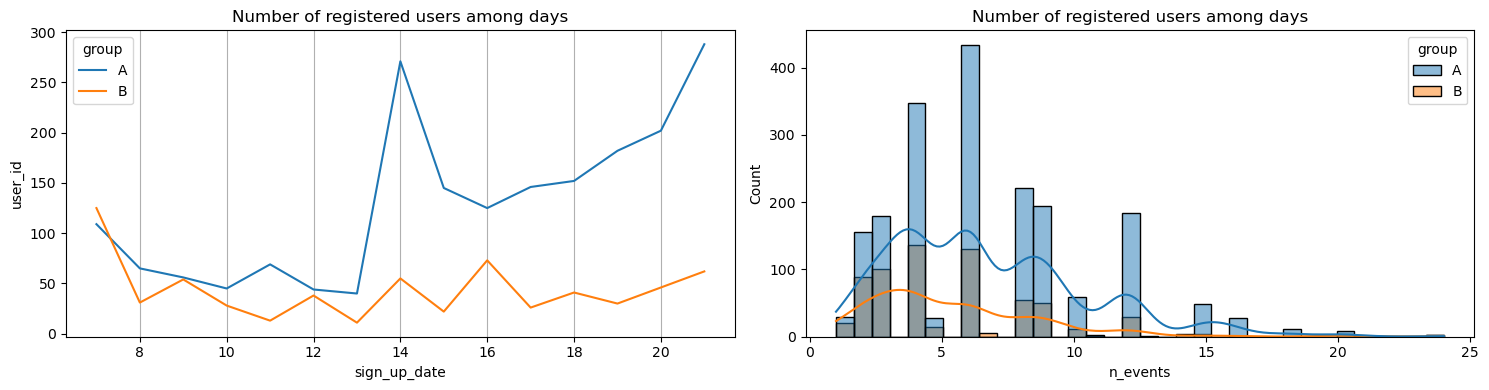

In [33]:
# visualize the sample characteristic
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# check number of new users during taking sample period
(sns
 .lineplot(ax=axes[0], data=new_eu_users_participants, x='sign_up_date', y='user_id', hue='group')
 .set(title='Number of registered users among days'))
axes[0].grid(axis='x')

# get the distribution of n_events per users
(sns
 .histplot(ax=axes[1], data=n_events_users, x='n_events', alpha=0.5, hue='group', kde=True)
 .set(title='Number of registered users among days'))

plt.tight_layout()
plt.show()

In [34]:
# check whether distribution of n_events per user from both groups is the same (H0)
mannwhitneyu_test(control=n_events_users.query('group=="A"')['n_events'],
                  treatment=n_events_users.query('group=="B"')['n_events'],
                  alpha=0.05)

p-value: 5.772482536915059e-18
Reject H0: The distribution of the two groups is different significantly
relative difference: -0.196


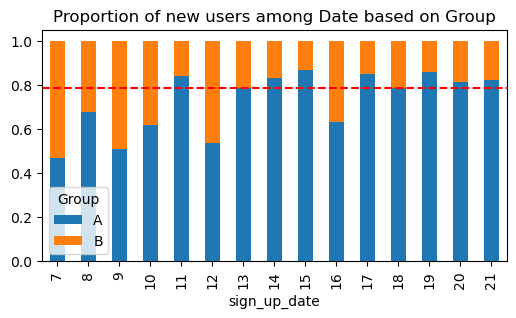

In [35]:
# set proportion line between group A and group B
threshold = participants_events['group'].value_counts(normalize=True)[0]

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(6, 3))
pivot_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Proportion of new users among Date based on Group')
ax.axhline(y=threshold, color='red', linestyle='--')
ax.legend(title='Group')

plt.show()

**FINDING:**<br>
- The proportions of participants sampled for group A and group B are not equal, which may introduce bias and impact the validity of our A/B test results.
- Group A had a higher proportion number of new users on the 11th, 14th, 15th, 17th, and 19th, with a particularly significant increase on the 14th.
- Group B had a higher proportion of new users on the 7th, 8th, 9th, 10th, 12th, and 16th.
- There is a significant difference in the distribution of the number of events per user between group A and group B. On average, the number of events per user in Group B is 19.6% lower than in Group A.

**ACTION:**<br>
- Additionally, investigate the impact of the imbalanced sample size on the conversion funnel.
- Compare the conversion funnel from included vs excluded anomalous data. We decide to exclude participants who signed up on 7th, 9th, 12th, and 14th December.

### Clean Sample Datasets <a id='clean_data'></a>

This section will retrieve datasets that are ready for analysis. <br>
The first dataset is called "participants_events" and it contains information on all the participants we have. <br>
The second dataset is called "clean_participants_events" and it excludes participants who signed up on the 7th, 9th, 12th, and 14th of December 2020.

Furthermore, we will retrieve the datasets "new_eu_users_participants" and "clean_new_eu_users_participants" for the purpose of users comparison.

#### `participants_events`
This dataset contains all new eu users who sign up during `2020-12-07`-`2020-12-21` and joined `recommender_system_test` only. <br>
Their activies within 14 days after signing up were recorded in this dataset.


In [36]:
# retrieve participants_events
participants_events.tail(3)

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,revenue,lifetime
16956,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-14 05:48:50,login,0.0,0.0
16957,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:03,login,0.0,1.0
16958,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20 20:01:32,login,0.0,6.0


In [37]:
# check info
participants_events.describe(include='all').fillna('')

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,revenue,lifetime
count,16581,16581,16581,16581,16581,16581,16581,16581,16581.0,16581.0
unique,2594,2,1,15,1,4,11086,4,,
top,CED71698585A2E46,A,recommender_system_test,2020-12-14 00:00:00,EU,Android,2020-12-20 09:51:02,login,,
freq,24,13041,16581,2355,16581,7388,5,7473,,
first,,,,2020-12-07 00:00:00,,,2020-12-07 00:16:00,,,
last,,,,2020-12-21 00:00:00,,,2020-12-29 23:38:29,,,
mean,,,,,,,,,3.002403,2.799831
std,,,,,,,,,25.926221,3.423898
min,,,,,,,,,0.0,0.0
25%,,,,,,,,,0.0,0.0


#### `clean_participants_events`  

This dataset contains new eu users who signed up during `2020-12-07`-`2020-12-21` and joined `recommender_system_test` only. <br>
However, to maintain the sample proportion's consistency, we exclude new eu users who signed up on 7th, 9th, 12th, and 14th December 2020. <br>
Their activities within 14 days after signing up were recorded in this dataset.

In [38]:
# define the excluded sign up date
excluded_sign_up_date = ['2020-12-07', '2020-12-09', '2020-12-12', '2020-12-14']

# filter only qualified sign up date
clean_participants_events = participants_events.query('first_date not in @excluded_sign_up_date').reset_index(drop=True)

# print number of removed row
print('Removed rows:', len(participants_events)-len(clean_participants_events))
print('Ratio clean data to data:', len(clean_participants_events)/len(participants_events))

# retrieve clean_participants_events
clean_participants_events.tail(3)

Removed rows: 4968
Ratio clean data to data: 0.7003799529582052


,user_id,group,ab_test,first_date,region,device,event_dt,event_name,revenue,lifetime
11610,E26F13A65CEAC6EA,A,recommender_system_test,2020-12-17,EU,Mac,2020-12-17 08:45:52,login,0.0,0.0
11611,E26F13A65CEAC6EA,A,recommender_system_test,2020-12-17,EU,Mac,2020-12-19 23:30:22,login,0.0,2.0
11612,E26F13A65CEAC6EA,A,recommender_system_test,2020-12-17,EU,Mac,2020-12-20 18:41:25,login,0.0,3.0


In [39]:
# apply function for the number of unique test participants from data used
power_analysis(clean_participants_events['user_id'].nunique())

Expected participants from EU users: 5919
EU test participants we have: 1842
Gap : 4077
Power analysis: 1.0


In [40]:
# get number of events per user
clean_n_events_users = clean_participants_events.groupby(['user_id', 'group'], as_index=False)['event_name'].count()
clean_n_events_users.columns = ['user_id', 'group', 'n_events']

# check whether distribution of n_events per user from both groups is the same (H0)
mannwhitneyu_test(control=clean_n_events_users.query('group=="A"')['n_events'],
                  treatment=clean_n_events_users.query('group=="B"')['n_events'],
                  alpha=0.05)

p-value: 1.8956749763521564e-14
Reject H0: The distribution of the two groups is different significantly
relative difference: -0.232


In [41]:
clean_n_events_users.group.value_counts()

A    1459
B     383
Name: group, dtype: int64

**NOTE:**   Although we lost many test participants, our clean data is still adequate for the analysis. Additionally, we have to note that both groups have different distribution of number events per user. On average, the number of events per user in Group B is 23.2% lower than in Group A.

In [42]:
 # check info
clean_participants_events.describe(include='all').fillna('')

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,revenue,lifetime
count,11613,11613,11613,11613,11613,11613,11613,11613,11613.0,11613.0
unique,1842,2,1,11,1,4,7729,4,,
top,CED71698585A2E46,A,recommender_system_test,2020-12-21 00:00:00,EU,Android,2020-12-20 09:51:02,login,,
freq,24,9664,11613,2056,11613,5009,5,5216,,
first,,,,2020-12-08 00:00:00,,,2020-12-08 00:23:38,,,
last,,,,2020-12-21 00:00:00,,,2020-12-29 23:38:29,,,
mean,,,,,,,,,3.203676,2.561784
std,,,,,,,,,27.580895,3.145388
min,,,,,,,,,0.0,0.0
25%,,,,,,,,,0.0,0.0


#### `new_eu_users_participants` 

In [43]:
# retrieve `new_eu_users_participants`
new_eu_users_participants.tail(3)

,first_date,group,user_id,sign_up_date
27,2020-12-20,B,46,20
28,2020-12-21,A,288,21
29,2020-12-21,B,62,21


 #### `clean_new_eu_users_participants`

In [44]:
# remove anomalies date : 7, 9, 12, 14
clean_new_eu_users_participants = new_eu_users_participants.query('first_date not in @excluded_sign_up_date').reset_index(drop=True)
clean_new_eu_users_participants.tail(3)

,first_date,group,user_id,sign_up_date
19,2020-12-20,B,46,20
20,2020-12-21,A,288,21
21,2020-12-21,B,62,21


## EDA <a id='eda'></a>

This section will check conversion on each event stage. Here's the question that we will try to be answered :
- How's the cumulative number of each event from both groups?
- How's the conversion at different funnel stages from both groups?

### Data Transformation <a id='data_transformation'></a>

Initially, we will transform the datasets to perform the analysis. During the test period, we will compute the cumulative data derived from these variables:
1. number of login event and its' conversion
2. number of product page views and its' conversion
3. number of producr chart views and its' conversion
4. number of purchases and its' conversion
5. total revenue

Here's the step to calculate cumulative data:
| Step | Action | Result |
|------|--------|--------|
| 1 | Add dummy columns for each `event_name` | `participants_agg_act` |
| 2 | List dates for group A and B | `dates_groups` |
| 3 | Calculate cumulative data of `participants_agg_act` for each `dates_groups` | `cum_data` |
| 4 | Seperate cumulative data from group A and group B | `cum_data_a`, `cum_data_b` |

#### Aggregate participants activities

In [45]:
# Create function to aggregate participants activities

def agg_act (data):
    
    dummies_temp = pd.get_dummies(data['event_name'])                    ## 1 : make dummy columns for `event_name` category
    agg_act_temp = (pd
                    .concat([data, dummies_temp], axis=1)
                    .reset_index(drop=True))                             ## 2 : merge with ab_users_act
    agg_act_temp['event_date'] = agg_act_temp['event_dt'].dt.day         ## 3: get day from event date
 
    return agg_act_temp                                                  ## 4 : return the result

In [46]:
# apply function to `participants_events` and `clean_participants_events`
participants_agg_act = agg_act(participants_events)
clean_participants_agg_act = agg_act(clean_participants_events)

In [47]:
# retrieve and check the result
participants_agg_act.tail(2)

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,revenue,lifetime,product_cart,product_page,purchase,login,event_date
16579,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:03,login,0.0,1.0,0,0,0,1,15
16580,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20 20:01:32,login,0.0,6.0,0,0,0,1,20


In [48]:
# retrieve and check the result
clean_participants_agg_act.tail(2)

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,revenue,lifetime,product_cart,product_page,purchase,login,event_date
11611,E26F13A65CEAC6EA,A,recommender_system_test,2020-12-17,EU,Mac,2020-12-19 23:30:22,login,0.0,2.0,0,0,0,1,19
11612,E26F13A65CEAC6EA,A,recommender_system_test,2020-12-17,EU,Mac,2020-12-20 18:41:25,login,0.0,3.0,0,0,0,1,20


#### Calculate cumulative value

In [49]:
# create function to generate datframe that calculate cumulative value
# from aggregate participants activities

def calculate_cumulative (agg_data) :
    
    # STEP 1 : CREATE `date` AND `group` TABLE
    dates_groups = (agg_data
                    .groupby(['event_date', 'group'], as_index=False)
                    .agg({'user_id':'nunique'})
                    .drop_duplicates(['event_date', 'group'])
                    .reset_index(drop=True)
                   )
    
    

    # STEP 2: aggregate and count parameters in daily activities from both groups
    cum_data_temp = (dates_groups
             .apply(lambda df: agg_data
                               .loc[(agg_data['event_date'] <= df['event_date']) & (agg_data['group'] == df['group'])]
                               .agg({'event_date' : 'max',
                                     'group' : 'max',
                                     'user_id' : 'nunique',
                                     'login':'sum',
                                     'product_page':'sum',
                                     'product_cart':'sum',
                                     'purchase':'sum',
                                     'revenue' : 'sum'})
                                ,axis=1
                   )
             .sort_values(by=['event_date','group'])
            )
    
    # STEP 3 : calculate conversion from each stage and average revenue per customer
    cum_data_temp['conversion_page'] = cum_data_temp['product_page']/cum_data_temp['login']
    cum_data_temp['conversion_cart'] = cum_data_temp['product_cart']/cum_data_temp['product_page']
    cum_data_temp['conversion_purchase'] = cum_data_temp['purchase']/cum_data_temp['product_cart']
    cum_data_temp['avg_revenue'] = cum_data_temp['revenue']/cum_data_temp['user_id']
    
    # STEP 4 : generate the result
    return cum_data_temp

In [50]:
# apply the function to generate cumulative data
# separate dataset for group A and group B

## cumulative datasets
cum_data = calculate_cumulative(participants_agg_act)
cum_data_a = cum_data.query("group == 'A'")
cum_data_b = cum_data.query("group == 'B'")

## clean cumulative datasets
clean_cum_data = calculate_cumulative(clean_participants_agg_act)
clean_cum_data_a = clean_cum_data.query("group == 'A'")
clean_cum_data_b = clean_cum_data.query("group == 'B'")

In [51]:
# check tranformation result
## retrieve CUMULATIVE DATA
cum_data.tail(4)

,event_date,group,user_id,login,product_page,product_cart,purchase,revenue,conversion_page,conversion_cart,conversion_purchase,avg_revenue
40,28,A,1939,5672,3672,1744,1724,39297.76,0.647391,0.474946,0.988532,20.267024
41,28,B,655,1685,896,472,455,10200.45,0.531751,0.526786,0.963983,15.573206
42,29,A,1939,5771,3738,1777,1755,39557.45,0.647721,0.475388,0.987620,20.400954
43,29,B,655,1702,904,474,460,10225.40,0.531140,0.524336,0.970464,15.611298


In [52]:
# check tranformation result
## retrieve CLEAN CUMULATIVE DATA
clean_cum_data.tail(4)

,event_date,group,user_id,login,product_page,product_cart,purchase,revenue,conversion_page,conversion_cart,conversion_purchase,avg_revenue
38,28,A,1459,4157,2690,1290,1298,30707.02,0.647101,0.479554,1.006202,21.046621
39,28,B,383,943,476,261,237,6212.63,0.504772,0.548319,0.908046,16.220966
40,29,A,1459,4256,2756,1323,1329,30966.71,0.647556,0.480044,1.004535,21.224613
41,29,B,383,960,484,263,242,6237.58,0.504167,0.543388,0.920152,16.286110


### Conversion into Event Comparison <a id='con_event'></a>

**Data Transformation**

In [53]:
# create function to calculate cumulative relative different

def cumulative_diff (cum_dataA, cum_dataB):
    
    # define variable columns used
    columns_used = ['conversion_page', 'conversion_cart', 'conversion_purchase', 'event_date']

    # merge variable columns of cum_dataA and cum_dataB
    mergeData_temp = cum_dataA[columns_used].merge(cum_dataB[columns_used], on='event_date',
                                               how='left', suffixes=['_A','_B'] )

    # calculate the relative difference
    mergeData_temp['rel_diff_conv_page'] = mergeData_temp['conversion_page_B']/mergeData_temp['conversion_page_A']-1
    mergeData_temp['rel_diff_conv_cart'] = mergeData_temp['conversion_cart_B']/mergeData_temp['conversion_cart_A']-1
    mergeData_temp['rel_diff_conv_purchase'] = mergeData_temp['conversion_purchase_B']/mergeData_temp['conversion_purchase_A']-1

    # generate the result
    return mergeData_temp

In [54]:
# apply the function to merge cumulative data from both groups
mergeData = cumulative_diff(cum_data_a, cum_data_b)
clean_mergeData = cumulative_diff(clean_cum_data_a, clean_cum_data_b)

In [55]:
# check and retrieve the result
mergeData.tail(3)

,conversion_page_A,conversion_cart_A,conversion_purchase_A,event_date,conversion_page_B,conversion_cart_B,conversion_purchase_B,rel_diff_conv_page,rel_diff_conv_cart,rel_diff_conv_purchase
19,0.647048,0.473772,0.991755,27,0.531043,0.532350,0.963753,-0.179284,0.123640,-0.028235
20,0.647391,0.474946,0.988532,28,0.531751,0.526786,0.963983,-0.178625,0.109150,-0.024834
21,0.647721,0.475388,0.987620,29,0.531140,0.524336,0.970464,-0.179987,0.102965,-0.017371


In [56]:
# check and retrieve the result
clean_mergeData.tail(3)

,conversion_page_A,conversion_cart_A,conversion_purchase_A,event_date,conversion_page_B,conversion_cart_B,conversion_purchase_B,rel_diff_conv_page,rel_diff_conv_cart,rel_diff_conv_purchase
18,0.647379,0.479756,1.007166,27,0.501085,0.560606,0.907336,-0.225979,0.168524,-0.099119
19,0.647101,0.479554,1.006202,28,0.504772,0.548319,0.908046,-0.219949,0.143395,-0.097551
20,0.647556,0.480044,1.004535,29,0.504167,0.543388,0.920152,-0.221432,0.131957,-0.084002


 **Visualize conversion funnel comparison**

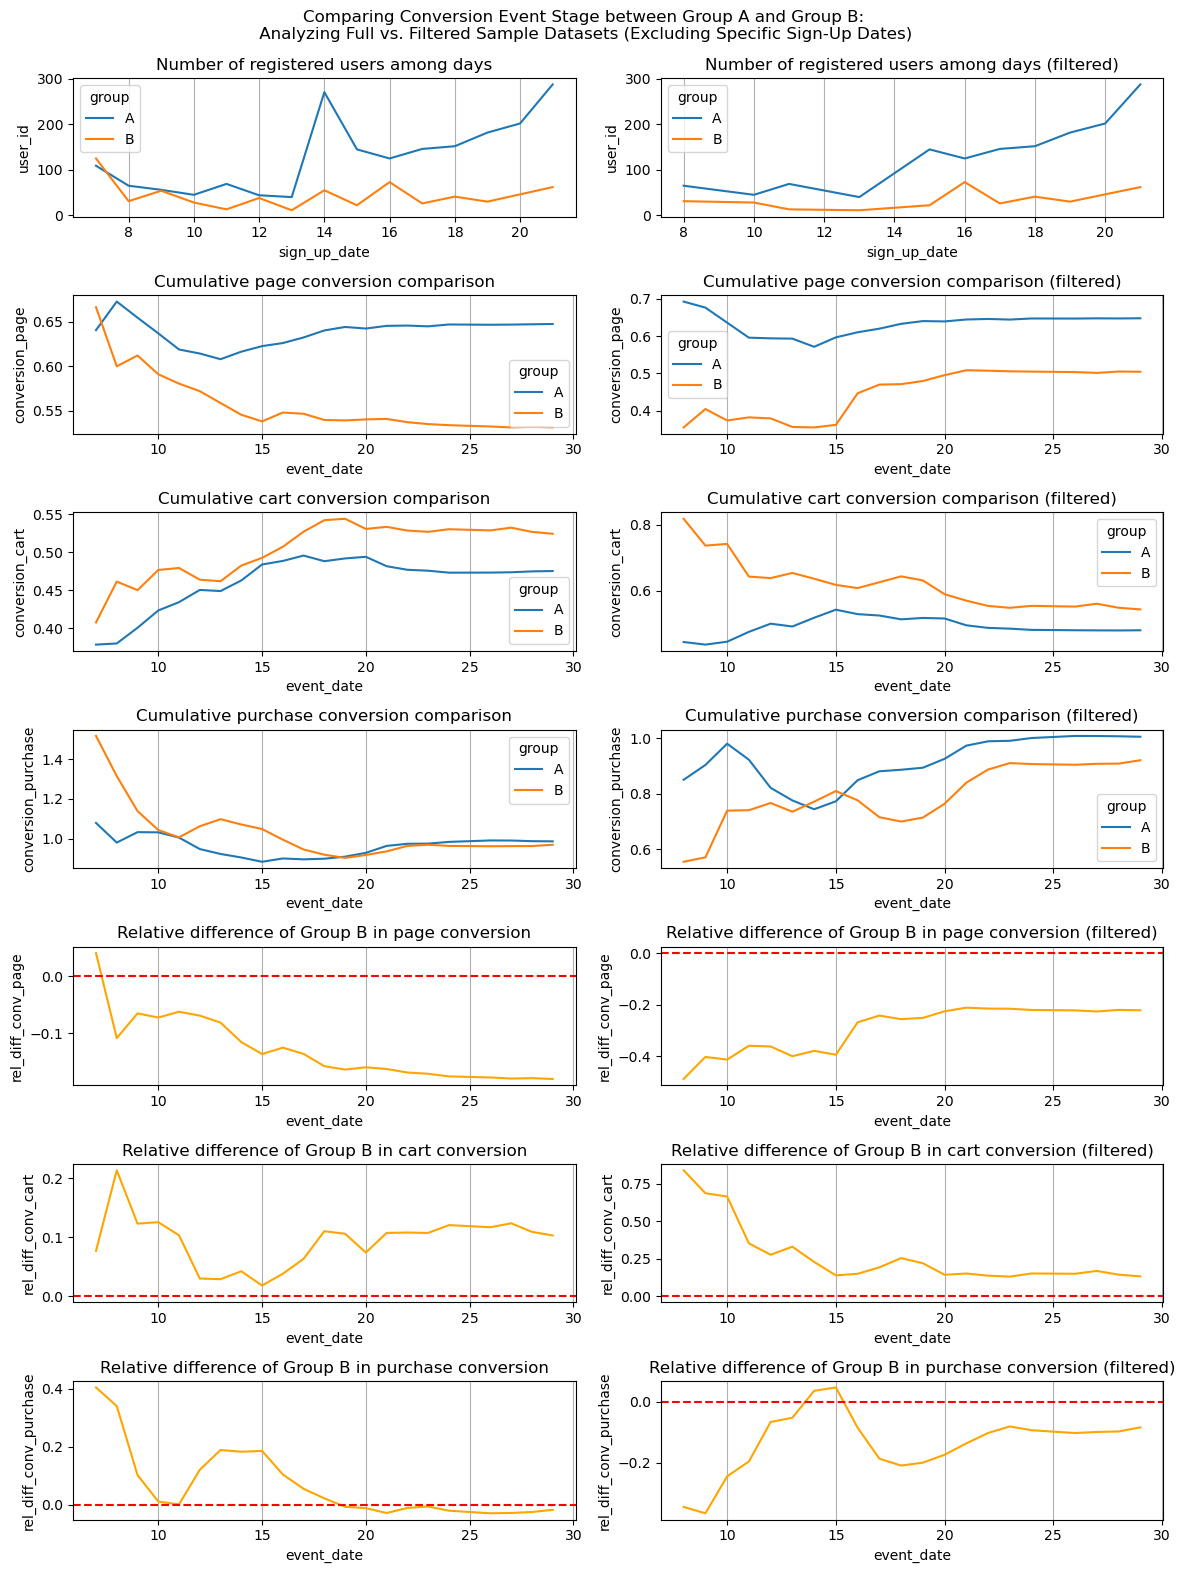

In [57]:
# Create the subplots
fig, axes = plt.subplots(7, 2, figsize=(12, 16))
plt.suptitle(f'Comparing Conversion Event Stage between Group A and Group B: \n Analyzing Full vs. Filtered Sample Datasets (Excluding Specific Sign-Up Dates) \n')

# Add vertical gridlines to all axes
for ax in axes.flat:
    ax.grid(axis='x')

# Subplot 0,0 : retrieve number of new users during taking sample period
(sns
 .lineplot(ax=axes[0,0], data=new_eu_users_participants, x='sign_up_date', y='user_id', hue='group')
 .set(title='Number of registered users among days'))

# Subplot 0,1 : retrieve number of new users during taking sample period (filtered dataset)
(sns
 .lineplot(ax=axes[0,1], data=clean_new_eu_users_participants, x='sign_up_date', y='user_id', hue='group')
 .set(title='Number of registered users among days (filtered)'))
## -------------------------------------------------------------------------------------------------------------------

# Subplot 1,0 : cumulative page conversion comparison
(sns
 .lineplot(ax=axes[1,0], data=cum_data, x='event_date', y='conversion_page', hue='group')
 .set(title='Cumulative page conversion comparison'))

# Subplot 1,1 : cumulative page conversion comparison (filtered dataset)
(sns
 .lineplot(ax=axes[1,1], data=clean_cum_data, x='event_date', y='conversion_page', hue='group')
 .set(title='Cumulative page conversion comparison (filtered)'))
## -------------------------------------------------------------------------------------------------------------------

# Subplot 2,0 : cumulative cart conversion comparison
(sns
 .lineplot(ax=axes[2,0], data=cum_data, x='event_date', y='conversion_cart', hue='group')
 .set(title='Cumulative cart conversion comparison'))

# Subplot 2,1 : cumulative cart conversion comparison (filtered dataset)
(sns
 .lineplot(ax=axes[2,1], data=clean_cum_data, x='event_date', y='conversion_cart', hue='group')
 .set(title='Cumulative cart conversion comparison (filtered)'))
## -------------------------------------------------------------------------------------------------------------------

# Subplot 3,0 : cumulative purchase conversion comparison
(sns
 .lineplot(ax=axes[3,0], data=cum_data, x='event_date', y='conversion_purchase', hue='group')
 .set(title='Cumulative purchase conversion comparison'))

# Subplot 3,1 : cumulative purchase conversion comparison (filtered dataset)
(sns
 .lineplot(ax=axes[3,1], data=clean_cum_data, x='event_date', y='conversion_purchase', hue='group')
 .set(title='Cumulative purchase conversion comparison (filtered)'))
## -------------------------------------------------------------------------------------------------------------------

# Subplots 4,0 - cumulative comparison on conversion into product page
(sns
 .lineplot(ax=axes[4,0], data=mergeData, x='event_date', y='rel_diff_conv_page', color='orange')
 .set(title='Relative difference of Group B in page conversion'))
axes[4, 0].axhline(y=0, color='red', linestyle='--')

# Subplots 4,1 - cumulative comparison on conversion into product page (filtered dataset)
(sns
 .lineplot(ax=axes[4,1], data=clean_mergeData, x='event_date', y='rel_diff_conv_page', color='orange')
 .set(title='Relative difference of Group B in page conversion (filtered)'))
axes[4, 1].axhline(y=0, color='red', linestyle='--')
## -------------------------------------------------------------------------------------------------------------------

# Subplots 5,0 - cumulative comparison on conversion into product cart
(sns
 .lineplot(ax=axes[5,0], data=mergeData, x='event_date', y='rel_diff_conv_cart', color='orange')
 .set(title='Relative difference of Group B in cart conversion'))
axes[5, 0].axhline(y=0, color='red', linestyle='--')

# Subplots 5,1 - cumulative comparison on conversion into product cart (filtered dataset)
(sns
 .lineplot(ax=axes[5,1], data=clean_mergeData, x='event_date', y='rel_diff_conv_cart', color='orange')
 .set(title='Relative difference of Group B in cart conversion (filtered)'))
axes[5, 1].axhline(y=0, color='red', linestyle='--')
## -------------------------------------------------------------------------------------------------------------------

# Subplots 6,0 - cumulative comparison on conversion into product purchase
(sns
 .lineplot(ax=axes[6,0], data=mergeData, x='event_date', y='rel_diff_conv_purchase', color='orange')
 .set(title='Relative difference of Group B in purchase conversion'))
axes[6, 0].axhline(y=0, color='red', linestyle='--')

# Subplots 6,1 - cumulative comparison on conversion into product purchase (filtered dataset)
(sns
 .lineplot(ax=axes[6,1], data=clean_mergeData, x='event_date', y='rel_diff_conv_purchase', color='orange')
 .set(title='Relative difference of Group B in purchase conversion (filtered)'))
axes[6, 1].axhline(y=0, color='red', linestyle='--')
## -------------------------------------------------------------------------------------------------------------------


plt.tight_layout()
plt.show()


**FINDINGS:**<br>
- Based on the cumulative conversion line plots in both full and filtered sample datasets, it can be inferred that Group A initially demonstrated a better page and purchase conversion rate compared to Group B, and this difference was maintained or potentially improved towards the end of the test period. On the contrary, the cart line plots show Group B performed better on conversion pages than Group A. Still, It kept decreasing its conversion performance gradually toward the end of the test period. 
- In the full sample datasets, the relative difference curve of Group B to Group A shows a downward trend for all those variables, respectively. It indicates that the new recommender system implemented in Group B might be underperforming compared to the existing system in Group A. However, we can see that the cart conversion of Group B is consistently higher than Group A
- In the filtered sample datasets, the relative difference curve of Group B to Group A shows underperforming regarding the page and purchase conversion rate. However, Its' conversions improved in the mid and stabilized toward the end of the test
- On the contrary, in the filtered sample datasets, the cart conversion of Group B is consistently higher than Group A. In the beginning, the cart conversion of Group B was immensely better than Group A, until in the mid, it declined and stabilized toward the end of the test period.


**INSIGHTS:**<br>
- Group A shows better performance than Group B in page and purchase conversion in both full and filtered sample datasets
- Group B performs better than Group B in cart conversion in full and filtered sample datasets.

**ACTIONS:**<br>
- We have to conduct statistical tests to determine the statistical significance or the underlying factors contributing to these observed differences.

**RECOMMENDATIONS:**<br>
- Considering the impacts of marketing offerings and seasonality on both groups is crucial. Perhaps one of the groups might benefit more from the marketing offerings, leading to higher engagement and conversion rates compared to the control group
- The observed effects might be specific to the test period and not necessarily reflective of long-term trends or generalizability. Assessing the sustainability and scalability of the observed effects is essential beyond the particular period influenced by marketing and seasonality.

### Conversion Funnel Summary <a id='con_funnel'></a>

This section will visualize the comparison of the conversion funnel between the control (A) group and the treatment (B) group in each stage.

In [58]:
# create function for generating conversion funnel

def conversion_funnel(agg_data):
    # calculate the number of users at each step
    funnel_count = (agg_data
                     .groupby(['event_name', 'group'], as_index=False)
                     .agg({'user_id':'nunique'})
                     .rename(columns={'event_name':'stage', 'user_id':'n_customers'})
                    )

    # define the desired order of event names
    desired_order = ['login', 'product_page', 'product_cart', 'purchase']


    # Convert event_name column to Categorical data type with desired order
    funnel_count['stage'] = pd.Categorical(funnel_count['stage'], categories=desired_order, ordered=True)

    # Sort the DataFrame by the event_name column
    funnel_count = funnel_count.sort_values('stage')

    # seperate funnel count based on group
    funnel_count_a = funnel_count.query("group=='A'")
    funnel_count_b = funnel_count.query("group=='B'")
    
    # visualize conversion funnel by group
    
    ## create the figure
    fig = go.Figure()
    
    ## Add the funnel traces
    fig.add_trace(go.Funnel(
        name = 'Group A',
        y = funnel_count_a['stage'],
        x = funnel_count_a['n_customers'],
        textinfo = "value+percent previous"))

    fig.add_trace(go.Funnel(
        name = 'Group B',
        orientation = "h",
        y = funnel_count_b['stage'],
        x = funnel_count_b['n_customers'],
        textposition = "inside",
        textinfo = "value+percent previous"))
    
    # Update the layout and add a title
    fig.update_layout(title='Conversion Funnel by Group')

    return fig.show()

In [59]:
# print title
print('NOTE: FROM FULL SAMPLE DATASET')

# create conversion funnel
conversion_funnel(participants_agg_act)

NOTE: FROM FULL SAMPLE DATASET


In [60]:
# print title
print('NOTE: FROM FILTERED SAMPLE DATASET')

# create conversion funnel for clean data
conversion_funnel(clean_participants_agg_act)

NOTE: FROM FILTERED SAMPLE DATASET


**FINDINGS:**<br>
- At a glance, we can see that the new recommender system only gave better conversion into cart page (3% better from the full sample dataset, 8% better from the filtered sample dataset)

## A/B TEST : STATISTICAL HYPOTESES TEST <a id='ab_test'></a>

### Hypotheses <a id='hypotheses'></a>

Here are the hypotheses that will be tested:

H1 : There's no difference in conversion into product page views in both groups <br>
H2 : There's no difference in conversion into product cart views in both groups <br>
H3 : There's no difference in conversion into purchase in both groups <br>
H4 : There's no difference in revenue in both group <br>

### Method <a id='method_test'></a>
To compare the proportions of categorical variables (conversion into product page views, product cart views, purchase success) between two groups, we will utilize a two-proportion Z-test.

Regarding the analysis of continuous variables (revenue), the statistical examination will be conducted in two stages:

Assumption Check: Normality Test
We will employ the Shapiro-Wilk test to assess whether the distribution of both groups satisfies the assumption for parametric tests.

Difference Test
To determine if there is a significant difference in revenue between the control and treatment groups, we will use an independent t-test if the distribution of both samples is normal (parametric test). However, if the distributions are skewed, we will employ the Mann-Whitney U test (non-parametric).

### Data preparation <a id='test_prep'></a>

In [61]:
# create function to sum each event category by users

def sum_user_act (agg_data):
    
    # sum events by each category for every user
    sum_report = (agg_data
                     .groupby(['group', 'user_id'], as_index=False)
                     .agg({'event_name':'count', 'login':'sum', 'product_page':'sum',
                           'product_cart':'sum', 'purchase':'sum', 'revenue':'sum'})
                     .rename(columns={'event_name':'n_events', 'revenue':'total_revenue'})
                 )
    # Replace values greater than 0 with 1
    sum_report[['login', 'product_page', 'product_cart', 'purchase']] = (sum_report[['login', 'product_page', 'product_cart', 'purchase']]
                                                                         .apply(lambda x: x.apply(lambda y: 1 if y > 0 else y))
                                                                        )
    # drop login success = 0
    sum_report = sum_report.query('login!=0')
    
    # seperate data from both groups
    sampleA_temp = sum_report.query("group=='A'").reset_index(drop=True)
    sampleB_temp = sum_report.query("group=='B'").reset_index(drop=True)
    
    # generate the result    
    return sum_report, sampleA_temp, sampleB_temp    


In [62]:
# apply the function to `participants_agg_act`
sum_report = sum_user_act(participants_agg_act)[0]
sampleA = sum_user_act(participants_agg_act)[1]
sampleB = sum_user_act(participants_agg_act)[2]

# apply the function to `clean_participants_agg_act`
clean_sum_report = sum_user_act(clean_participants_agg_act)[0]
clean_sampleA = sum_user_act(clean_participants_agg_act)[1]
clean_sampleB = sum_user_act(clean_participants_agg_act)[2]

In [63]:
# retrieve data
sum_report.sample(2)

,group,user_id,n_events,login,product_page,product_cart,purchase,total_revenue
2331,B,99AB3356C66C173F,4,1,1,0,0,0.0
733,A,60F150FD09831DEA,4,1,1,0,0,0.0


In [64]:
# retrieve data
clean_sum_report.tail(2)

,group,user_id,n_events,login,product_page,product_cart,purchase,total_revenue
1840,B,FDF5D9D1B047FA31,6,1,0,1,0,0.0
1841,B,FF8CF7057415EB29,2,1,1,0,0,0.0


In [65]:
# check the proportion of sample size groups
report_data = {'sum_report':sum_report, 'clean_sum_report':clean_sum_report}

for name, data in report_data.items():
    print(name.upper())
    print(data['group'].value_counts(normalize=True))
    print()

SUM_REPORT
A    0.747782
B    0.252218
Name: group, dtype: float64

CLEAN_SUM_REPORT
A    0.792074
B    0.207926
Name: group, dtype: float64



### A/B Test <a id='testing'></a>

#### Conversion rate on each event stage

This section will test hypotheses H1, H2, and H3 using a two-proportion z-test with an alpha level of 0.05.

We will utilize both the full and filtered sample datasets to compare whether they yield different results.

- H1: There is no difference in the conversion rate into product page views between both groups.
- H2: There is no difference in the conversion rate into product cart views between both groups.
- H3: There is no difference in the conversion rate into purchases between both groups.

In [66]:
# test H1, H2, H3
test_columns = ['product_page', 'product_cart', 'purchase']

print('HYPOTHESES TEST RESULT FOR FULL SAMPLE PARTICIPANTS')
for i in test_columns:
    print(i)
    two_proportion_z_test(sampleA[i], sampleB[i])
    print()
    
print('----------------------------------------------------------------------------------------------') 

print('HYPOTHESES TEST RESULT FOR FILTERED SAMPLE PARTICIPANTS')
for i in test_columns:
    print(i)
    two_proportion_z_test(clean_sampleA[i], clean_sampleB[i])
    print()
    

HYPOTHESES TEST RESULT FOR FULL SAMPLE PARTICIPANTS
product_page
Z-statistic: 4.1776
P-value: 0.0000
Rejecting the null hypothesis: there is a significant difference between the proportions

product_cart
Z-statistic: 1.0839
P-value: 0.2784
Failed to reject the null hypothesis: there is no reason to consider the proportions are different

purchase
Z-statistic: 1.2255
P-value: 0.2204
Failed to reject the null hypothesis: there is no reason to consider the proportions are different

----------------------------------------------------------------------------------------------
HYPOTHESES TEST RESULT FOR FILTERED SAMPLE PARTICIPANTS
product_page
Z-statistic: 4.3852
P-value: 0.0000
Rejecting the null hypothesis: there is a significant difference between the proportions

product_cart
Z-statistic: 0.6309
P-value: 0.5281
Failed to reject the null hypothesis: there is no reason to consider the proportions are different

purchase
Z-statistic: 1.3637
P-value: 0.1727
Failed to reject the null hypot

**VERDICT:**<br>
- Based on the results, there is significant evidence to suggest a difference in conversion rates to the product page between Group A and Group B, using both the full and filtered sample participants, at a chosen significance level of 0.05. Specifically, Group A shows a higher conversion rate than Group B.
- However, the conversion rates for adding items to the cart and making a purchase are similar between both groups.
- The Z-statistic values indicate the number of standard deviations by which the observed difference deviates from the expected difference under the null hypothesis. The positive value suggests that the proportion in one group is significantly higher than the other group's.

**NOTE:**<br>
It's important to note that while the statistical analysis shows significance, it does not necessarily imply practical significance. Further analysis and interpretation should be conducted to understand the magnitude of this difference and its practical implications.

#### Revenue Distribution

This section will test Hypothesis 4 (H4): whether the revenue distribution differs between Group A and Group B. We will employ the previously mentioned methodology to conduct this analysis.

**FULL SAMPLE PARTICIPANTS**

In [67]:
# normality test for revenue from both groups
shapiro_wilk_test (sampleA['total_revenue'], sampleB['total_revenue'])

p-value control:  0.0
Control : Reject H0, the distribution is not normal
p-value treatment:  5.605193857299268e-45
Treatment : Reject H0, the distribution is not normal


In [68]:
# FULL SAMPLE PARTICIPANTS
# test H4 : There's no different of revenue in both group
mannwhitneyu_test (sampleA['total_revenue'], sampleB['total_revenue'])

p-value: 0.0495630562900664
Reject H0: The distribution of the two groups is different significantly
relative difference: -0.234


**FILTERED SAMPLE PARTICIPANTS**

In [69]:
# normality test for revenue from both groups
shapiro_wilk_test (clean_sampleA['total_revenue'], clean_sampleB['total_revenue'])

p-value control:  0.0
Control : Reject H0, the distribution is not normal
p-value treatment:  2.875328489212322e-36
Treatment : Reject H0, the distribution is not normal


In [70]:
# test H4 : There's no different of revenue in both group
mannwhitneyu_test (clean_sampleA['total_revenue'], clean_sampleB['total_revenue'])

p-value: 0.050953985887096064
Accept H0: The distributions of the two groups are equal
relative difference: -0.233


**VERDICT:**<br>
- The results obtained from the full and filtered sample participants show contrasting outcomes in different tests.
- The independent t-test conducted with the full sample participants provides sufficient evidence to suggest a statistically significant difference between the revenue distributions of the two groups, with a chosen significance level of 0.05. However, when using the filtered sample participants, the results indicate that both revenue distributions are equal, showing the opposite outcome.
- Notably, there is a slight difference in the p-value when comparing the two versions of the sample.

**INSIGHT**<br>
- The relative differences of -0.234 and -0.233 observed in both versions of the results imply that the revenue distributions of group B are 23% lower than group A. In terms of practical significance, a relative difference which more than 20% is considered significant.

## CONCLUSION <a id='conclusion'></a>

After checking the dataset, it was found that it did not meet the technical requirements and was influenced by potential biases caused by concurrent tests and seasonal impacts. To address this, it is recommended to rework the AB test in order to eliminate external factors and accurately capture normal user behavior.

During the data preprocessing phase, duplicates and invalid values in the datasets were carefully examined. Missing values in the 'events' dataset, specifically for non-monetized events, were replaced with 0. Additionally, a power analysis was conducted to ensure that the sample size was sufficient to detect meaningful differences between the control and treatment groups. Furthermore, the clean sample analysis, which excluded anomalies, also provided an adequate sample size.

In the EDA (Exploratory Data Analysis) phase, it was observed that Group A exhibited better performance in terms of page and purchase conversions, whereas Group B showed superior performance in cart conversions. The new recommender system implemented in Group B displayed underperformance in page and purchase conversions compared to Group A, but consistently demonstrated higher cart conversions. To ascertain the significance and underlying factors contributing to these differences, statistical tests need to be conducted.

During the A/B Test - Statistical Hypotheses Test, it was determined that the conversion rate into product page views was significantly higher in Group A than in Group B. However, no significant differences were found between the two groups in terms of adding items to the cart and making a purchase. Moreover, the analysis of revenue distributions in the full and filtered sample datasets yielded contrasting outcomes, with Group B exhibiting a relative difference of 23% lower compared to Group A.

Analysis Conclusion:
- Group A consistently outperformed Group B in page and purchase conversions.
- Group B performed better in cart conversions.
- Practical implications and further analysis are necessary to understand the magnitude of these differences.

## RECOMMENDATIONS <a id='recommendations'></a>

Based on the analysis results, here are some recommendations and suggestions:
1. Consider the impact of marketing offerings and seasonality: It is important to account for these factors when evaluating the performance of the new recommender system. Perhaps one group benefited more from the marketing offerings, leading to higher engagement and conversion rates compared to the control group. Adjusting for these factors in the analysis or conducting separate analyses for different periods can provide a more accurate understanding of the system's performance.

2. Assess long-term sustainability and scalability: The observed effects might be specific to the test period influenced by marketing and seasonality. It is essential to evaluate the sustainability and scalability of the observed effects beyond this specific period. Consider conducting follow-up analyses or tests to assess the system's performance over a longer duration and different market conditions.

3. Conduct a new AB test during a low seasonality period: To better understand the full impact of the new recommender system, it is recommended to conduct a new AB test during a period with lower seasonality effects. This will help capture more normal user behavior and minimize the potential influence of external factors on the results. Comparing the performance of the control and treatment groups in a less volatile period can provide more reliable insights into the system's effectiveness.

4. Evaluate user feedback and satisfaction: Alongside quantitative analysis, it is valuable to collect qualitative feedback from users regarding their experience with the new recommender system. This qualitative feedback can provide additional insights into the system's performance and guide improvements.

5. Continuously monitor and iterate: Regularly assess the system's effectiveness, gather feedback, and iterate on the recommendations to optimize the performance and enhance user experience.

6. Consider statistical significance and practical significance:Evaluate the magnitude of the differences and their implications in real-world scenarios to make informed decisions.

<div class="alert alert-block alert-success">
    
# General comments
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
What a great job you did in this project, Ica! It was a pleasure to read every statement and conclusion you wrote. Very clear, organized and it's obvious you completely understood how this works. Let's move onto 15th!
</div>